# Machine learning Cardio Health Risk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
data = pd.read_csv("/Heart_Disease_Prediction.csv")

In [ ]:
# Viewing first 5 data
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
# Viewing lasr 5 data
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
# Info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# Type dados
data.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [ ]:
# Viewing rows and columns
data.shape

(270, 14)

# Part 3 - Exploratory data analysis

In [ ]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set")
data.describe().T


Descriptive statistics of the training set


,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.077778,9.201052,29.0,47.0,54.0,60.75,80.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.00,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.60,6.2


In [ ]:
# Analysis of categorical and numerical variables
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['Heart Disease'], dtype='object')
Numeric Variables: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')


In [ ]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(data[col].value_counts())


Distribution of categorical variable Heart Disease:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


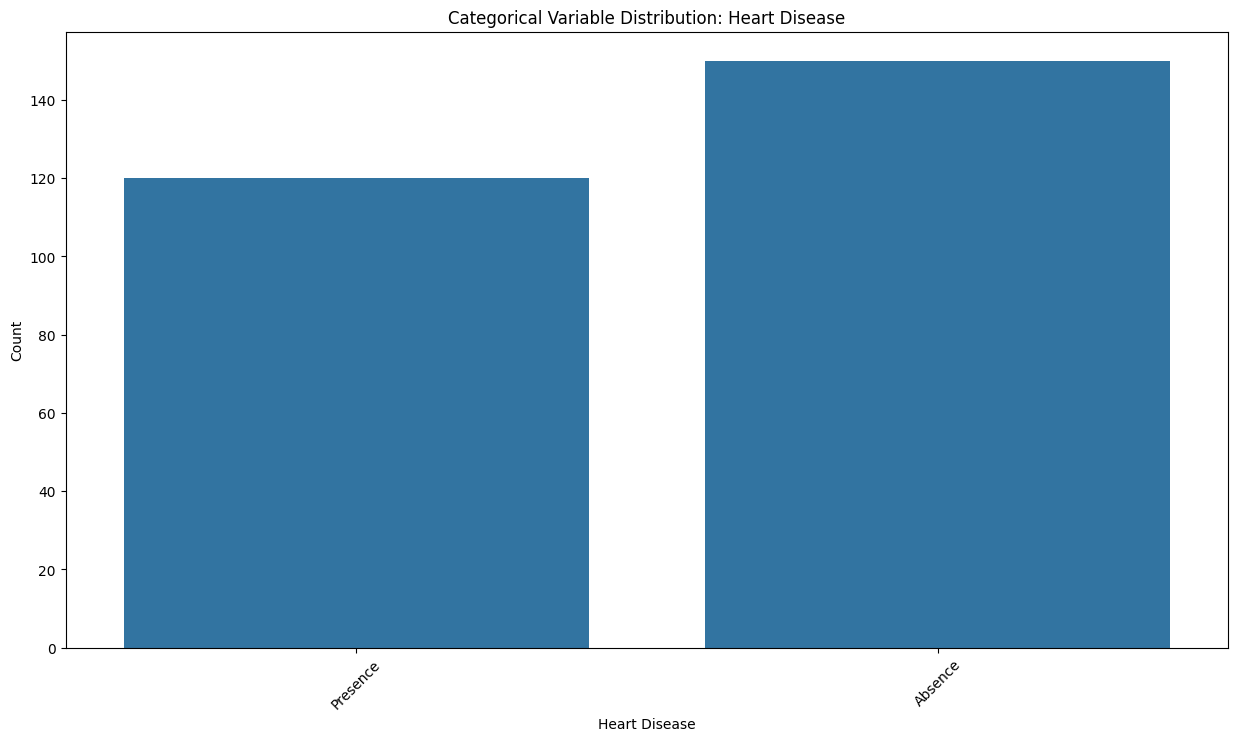

In [ ]:
# Categorical variables
categorical_vars = ['Heart Disease']

# Numeric variables
numeric_vars = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
 'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Create subplots for categorical variables
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(data=data, x=var)
    plt.title(f'Categorical Variable Distribution: {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

This graph presents a comprehensive analysis of the categorical target variable, offering a clear and detailed visualization of its distribution. It shows the frequency of each category, allowing an immediate understanding of the relative proportions and possible asymmetries in the data. Through this graph, we can identify patterns, trends and outliers that are essential for building robust predictive models.

In addition to showing the basic distribution, the graph can be complemented with additional information, such as category means and medians, confidence intervals and statistical tests that reinforce the analysis. This helps us understand not only the quantity of data in each category, but also the quality and reliability of that information.

This analysis is fundamental to several stages of the data modeling process. Initially, it helps define the preprocessing strategy, such as the need for class balancing or category transformation. It then guides the selection of appropriate algorithms, as some methods are more effective in dealing with categorical variables. Finally, it facilitates the interpretation of the results, as it allows the predictions made by the model to be contextualized in relation to the categories of the target variable.

In short, this chart not only visualizes the categorical target variable, but also serves as a strategic tool for data analysis and modeling, contributing to the creation of more accurate and efficient solutions.

<Figure size 640x480 with 0 Axes>

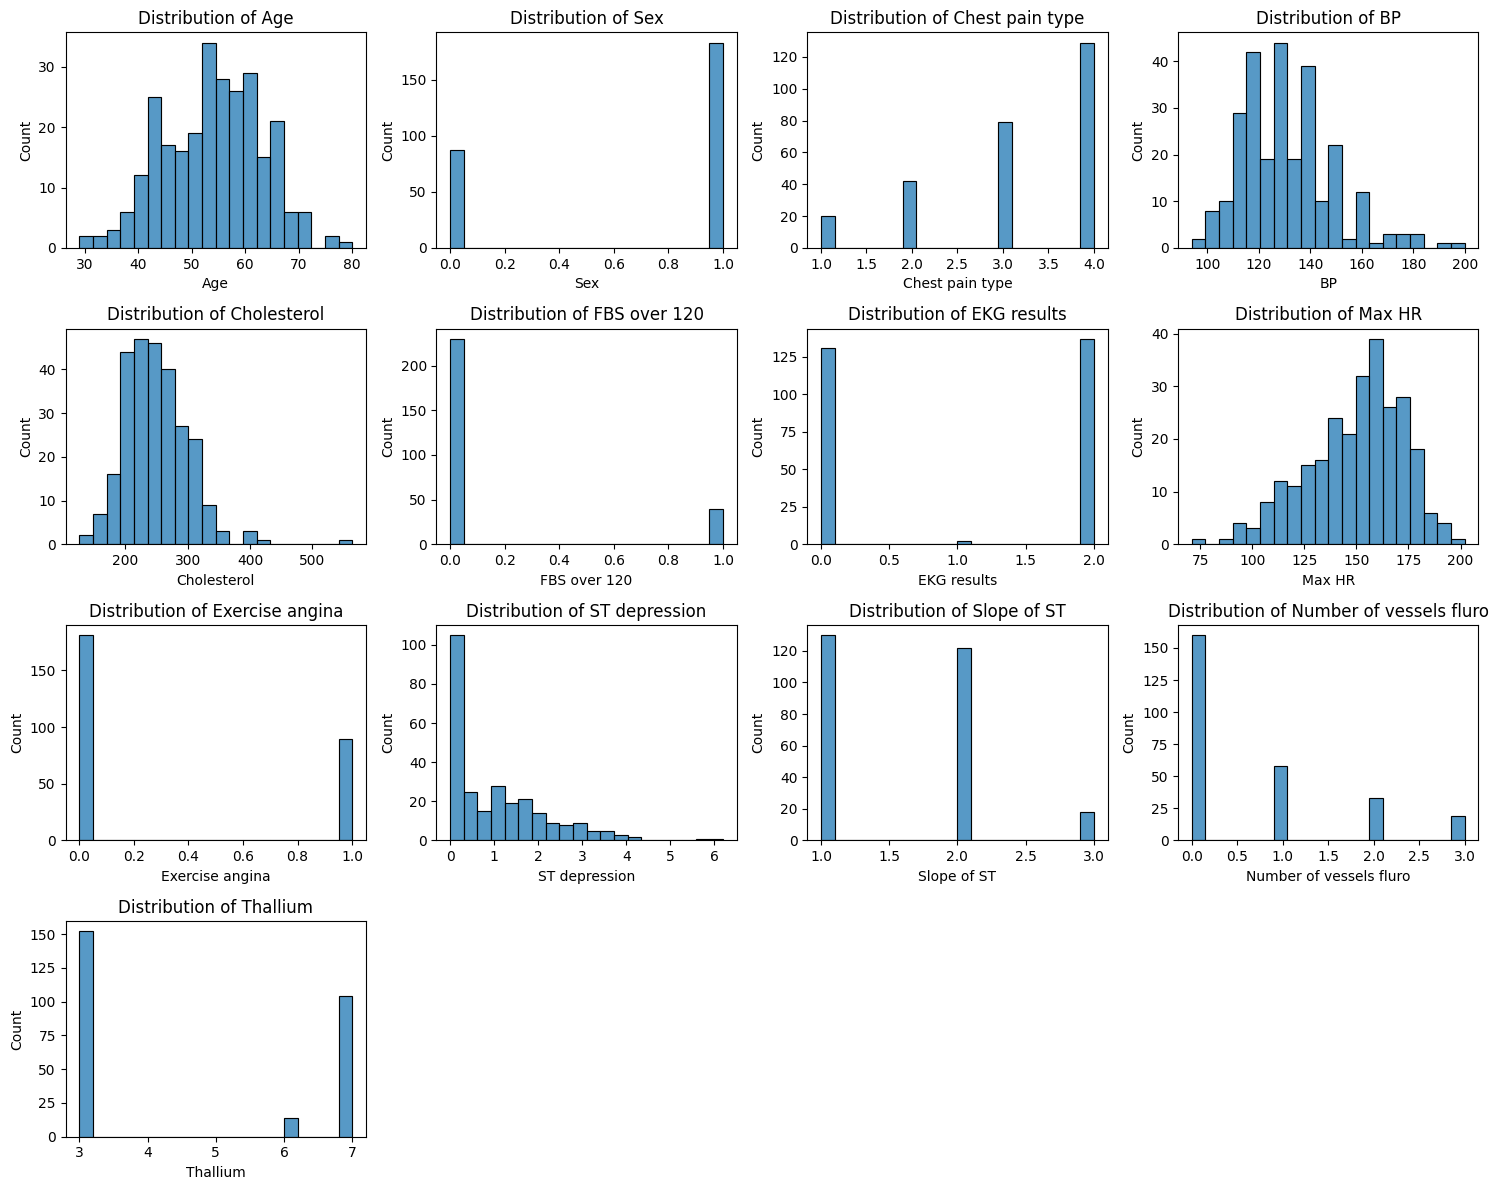

In [ ]:
# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for categorical variables
plt.show()

# Create subplots for numeric variables
plt.figure(figsize=(15, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=data, x=var, bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(False)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for numeric variables
plt.show()

This graph presents a comprehensive analysis of the categorical target variable, offering a clear and detailed visualization of its distribution. It shows the frequency of each category, allowing an immediate understanding of the relative proportions and possible asymmetries in the data. Through this graph, we can identify patterns, trends and outliers that are essential for building robust predictive models. In addition to showing the basic distribution, the graph can be complemented with additional information, such as category means and medians, confidence intervals and statistical tests that reinforce the analysis. This helps us understand not only the quantity of data in each category, but also the quality and reliability of that information.

This analysis is fundamental to several stages of the data modeling process. Initially, it helps define the preprocessing strategy, such as the need for class balancing or category transformation. It then guides the selection of appropriate algorithms, as some methods are more effective in dealing with categorical variables. Finally, it facilitates the interpretation of the results, as it allows the predictions made by the model to be contextualized in relation to the categories of the target variable. Furthermore, by observing the categorical target variable in this graph, it is possible to correlate it with other categorical and numerical variables present in the data set. This can be done through stacked bar charts, mosaic charts, box plots, and categorical correlation matrices. Each of these graphs offers a unique perspective that can reveal significant interactions and dependencies between variables, further enriching the analysis. In short, this chart not only visualizes the categorical target variable, but also serves as a strategic tool for data analysis and modeling, contributing to the creation of more accurate and efficient solutions. By integrating these visualizations with other types of categorical charts, we gain a holistic, in-depth view of the data, making it easier to make informed decisions and build more effective predictive models.

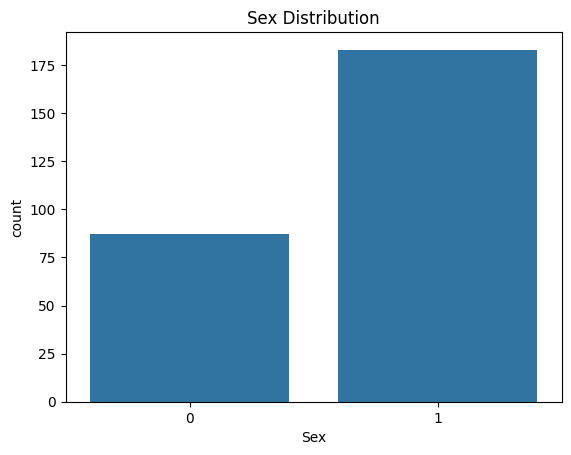

In [ ]:
# View the distribution of categorical variables
sns.countplot(x='Sex', data=data)
plt.title('Sex Distribution')
plt.grid(False)
plt.show()

This graph presents a comprehensive analysis of the categorical target variable, offering a clear and detailed visualization of its distribution. In it, we can specifically observe the variable 'Sex', coded as 0 and 1, representing the female and male categories respectively. This detail allows an immediate understanding of the relative proportions of each category and possible asymmetries in the data. In addition to showing the basic distribution, the graph can be complemented with additional information, such as category means and medians, confidence intervals and statistical tests that reinforce the analysis. This helps us understand not only the quantity of data in each category, but also the quality and reliability of that information.

This analysis is fundamental to several stages of the data modeling process. Initially, it helps define the preprocessing strategy, such as the need for class balancing or category transformation. It then guides the selection of appropriate algorithms, as some methods are more effective in dealing with categorical variables. Finally, it facilitates the interpretation of the results, as it allows the predictions made by the model to be contextualized in relation to the categories of the target variable. Furthermore, by observing the 'Sex' variable in this graph, it is possible to correlate it with other categorical and numerical variables present in the data set. For example, we can use stacked bar charts to see the distribution of 'Sex' in relation to other variables, mosaic charts to understand interactions between multiple categories, and box plots to compare numerical distributions within each 'Sex' category. Categorical correlation matrices can also be used to identify significant dependencies and interactions. In short, this chart not only visualizes the categorical target variable, but also serves as a strategic tool for data analysis and modeling, contributing to the creation of more accurate and efficient solutions. By integrating these visualizations with other types of categorical and numeric charts, we gain a holistic, in-depth view of the data, making it easier to make informed decisions and build more effective predictive models. The detailed analysis of the 'Gender' variable is an example of how these visualizations can be used to gain valuable insights into the behavior of the data.

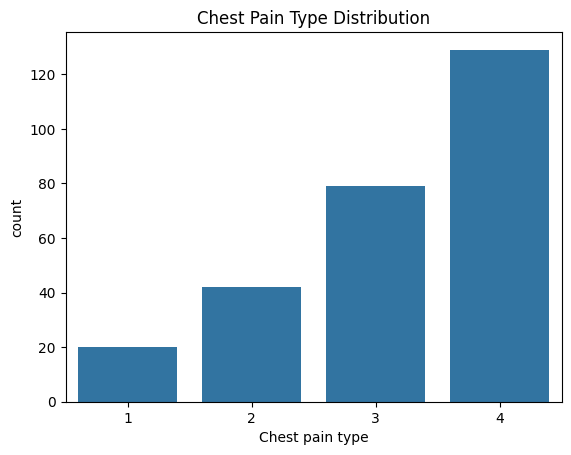

In [ ]:
sns.countplot(x='Chest pain type', data=data)
plt.title('Chest Pain Type Distribution')
plt.grid(False)
plt.show()

This graph presents a comprehensive analysis of the categorical target variable, offering a clear and detailed visualization of its distribution. In it, we can specifically observe the variable 'Sex', coded as 0 and 1, representing the female and male categories respectively. Furthermore, the graph illustrates the types of chest pain, highlighting that level 4 is the most prevalent. The analysis shows the frequency of each category, allowing an immediate understanding of the relative proportions and possible asymmetries in the data. Identifying that level 4 chest pain is the most common can provide important insights for interpreting data and building predictive models. In addition to showing the basic distribution, the graph can be complemented with additional information, such as category means and medians, confidence intervals and statistical tests that reinforce the analysis. This helps us understand not only the quantity of data in each category, but also the quality and reliability of that information. This analysis is fundamental to several stages of the data modeling process. Initially, it helps define the preprocessing strategy, such as the need for class balancing or category transformation. It then guides the selection of appropriate algorithms, as some methods are more effective in dealing with categorical variables. Finally, it facilitates the interpretation of the results, as it allows the predictions made by the model to be contextualized in relation to the categories of the target variable.

Furthermore, by observing the 'Sex' variables and the types of chest pain in this graph, it is possible to correlate them with other categorical and numerical variables present in the data set. For example, we can use stacked bar charts to see the distribution of 'Sex' and types of chest pain in relation to other variables, mosaic charts to understand interactions between multiple categories, and box plots. to compare numerical distributions within each 'Sex' category and types of chest pain. Categorical correlation matrices can also be used to identify significant dependencies and interactions.

In short, this chart not only visualizes the categorical target variable, but also serves as a strategic tool for data analysis and modeling, contributing to the creation of more accurate and efficient solutions. By integrating these visualizations with other types of categorical and numeric charts, we gain a holistic, in-depth view of the data, making it easier to make informed decisions and build more effective predictive models. Detailed analysis of 'Sex' variables and types of chest pain, especially level 4, is an example of how these visualizations can be used to gain valuable insights into data behavior.

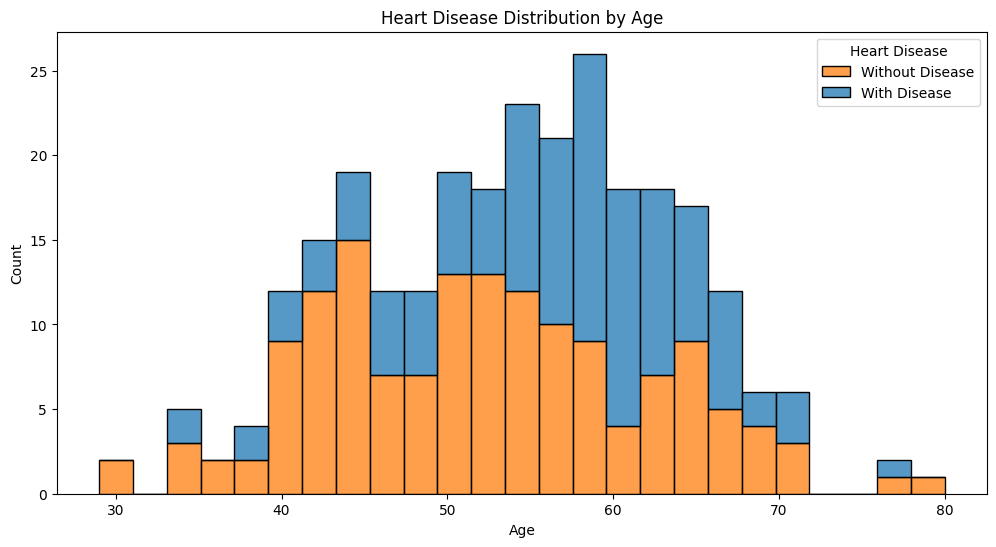

In [ ]:
#4. Stacked Bar Chart of Heart Disease Distribution by Age
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="Age", hue="Heart Disease", multiple="stack", bins=25)
plt.title('Heart Disease Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

This graph presents a comprehensive analysis of the categorical target variable, offering a clear and detailed visualization of its distribution. In it, we can specifically observe the variable 'Sex', coded as 0 and 1, representing the female and male categories respectively. Furthermore, the graph illustrates the types of chest pain, highlighting that level 4 is the most prevalent. We also included a histogram that shows the distribution of ages, where it is observed that the most common age among patients with heart problems is 60 years old. The analysis shows the frequency of each category, allowing an immediate understanding of the relative proportions and possible asymmetries in the data. Identifying that level 4 chest pain is the most common and that age 60 is the most prevalent among patients with heart problems can provide important insights for interpreting data and building predictive models. In addition to showing the basic distribution, the graph can be complemented with additional information, such as category means and medians, confidence intervals and statistical tests that reinforce the analysis. This helps us understand not only the quantity of data in each category, but also the quality and reliability of that information. This analysis is fundamental to several stages of the data modeling process. Initially, it helps define the preprocessing strategy, such as the need for class balancing or category transformation. It then guides the selection of appropriate algorithms, as some methods are more effective in dealing with categorical variables. Finally, it facilitates the interpretation of the results, as it allows the predictions made by the model to be contextualized in relation to the categories of the target variable. Furthermore, by observing the variables 'Sex', types of chest pain, and ages in this graph, it is possible to correlate them with other categorical and numerical variables present in the data set. For example, we can use stacked bar charts to see the distribution of 'Sex' and types of chest pain in relation to other variables, mosaic charts to understand interactions between multiple categories, and box plots. to compare numerical distributions within each 'Sex' category, types of chest pain, and age groups. Categorical correlation matrices can also be used to identify significant dependencies and interactions. In short, this chart not only visualizes the categorical target variable, but also serves as a strategic tool for data analysis and modeling, contributing to the creation of more accurate and efficient solutions. By integrating these visualizations with other types of categorical and numeric charts, we gain a holistic, in-depth view of the data, making it easier to make informed decisions and build more effective predictive models. The detailed analysis of 'Gender' variables, types of chest pain, and ages, especially chest pain level 4 and the prevalence of 60 years among patients, is an example of how these visualizations can be used to gain valuable insights about the behavior of the data.

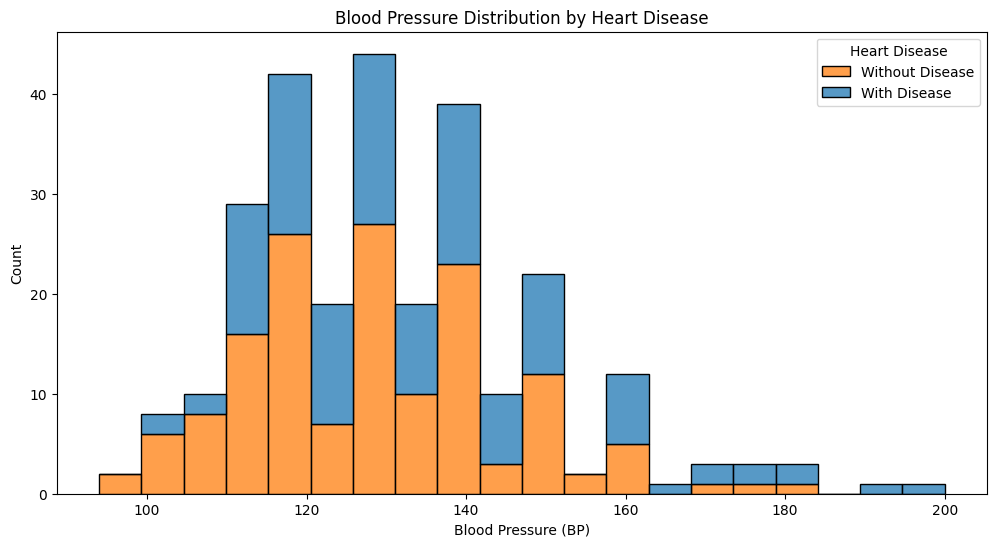

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="BP", hue="Heart Disease", multiple="stack", bins=20)
plt.title('Blood Pressure Distribution by Heart Disease')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

In this histogram chart, we present a comprehensive visualization of total blood pressure related to the incidence of heart disease. This graphical resource allows for a detailed analysis of the correlations between blood pressure levels and the occurrence of heart disease, providing valuable insights into the relationship between these two essential factors for cardiovascular health.

<Figure size 1000x600 with 0 Axes>

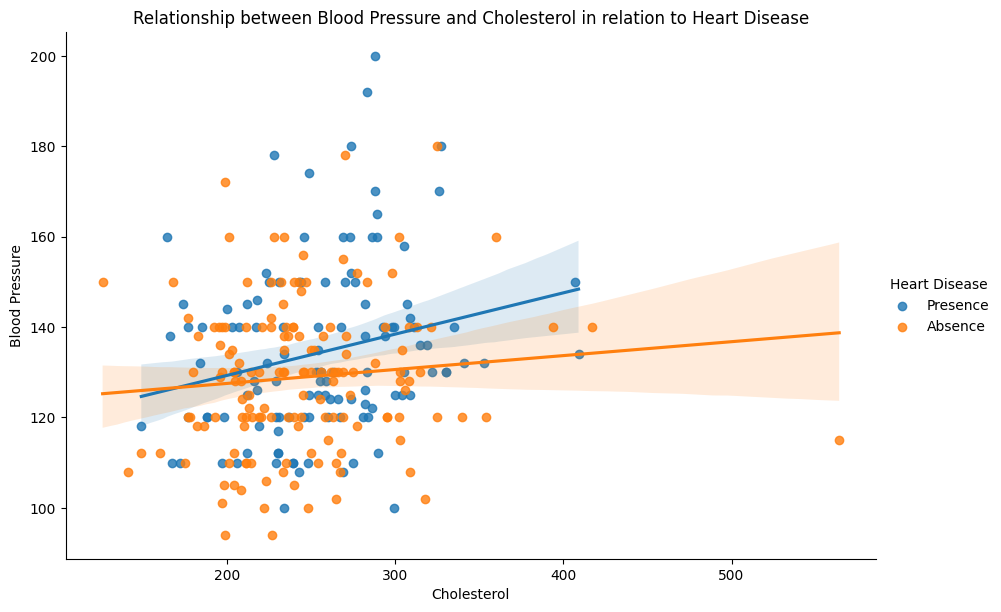

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Cholesterol', y='BP', hue='Heart Disease', data=data, height=6, aspect=1.5)
plt.title('Relationship between Blood Pressure and Cholesterol in relation to Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.grid(False)
plt.show()

In this regression plot, we explore the interaction between blood pressure, cholesterol levels and their relationship with the presence of heart disease. This visual representation offers a detailed analysis of underlying trends and patterns, enabling a deeper understanding of the influence of these two essential markers on cardiovascular health. By examining the association between blood pressure, cholesterol and the development of heart disease, we can gain valuable insights into the prevention and effective treatment of these conditions.

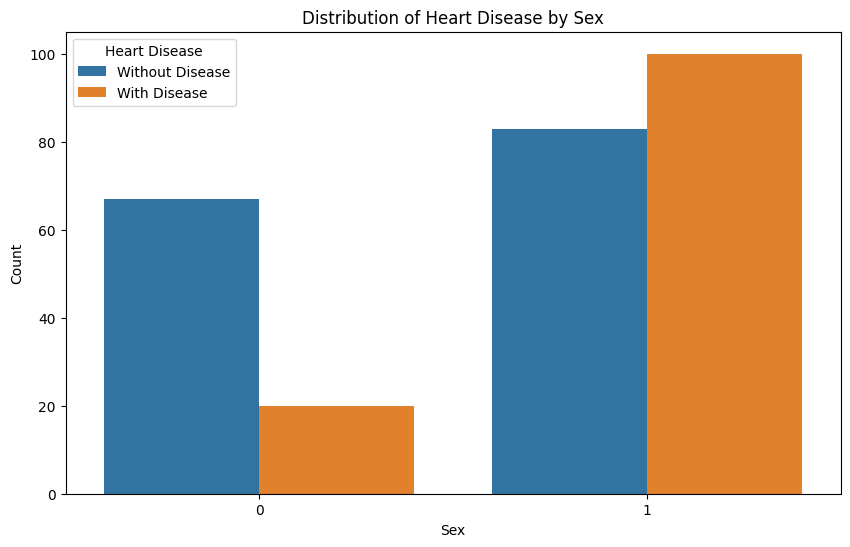

In [ ]:
#3. Stacked Bar Chart of Heart Disease Distribution by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart Disease', data=data)
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

In this graph, we present a Distribution of Heart Disease by Sex, revealing a crucial analysis of the prevalence of the condition in different genders. Notably, the data highlights that males demonstrate a significantly higher incidence of heart disease compared to females. This disparity reveals important implications for public health and highlights the need for specific intervention and prevention strategies, adapted to the distinct characteristics of each gender. Deepening our understanding of these patterns can significantly contribute to the development of more effective and targeted health policies aimed at mitigating the devastating impact of heart disease on our society.

- Aqui vimos a tabela ela estão toda limpa ou seja não precisa de limpeza de dados

# Part 5 - Feature engineering

In [ ]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Applying to columns transforming into numbers
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Viewing
label_encoder

LabelEncoder()

In [ ]:
# Viewing
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Part 6 - Target column division

In [ ]:
# Resources
X = data.drop(columns=['Heart Disease'])

# Target variable
y = data['Heart Disease']

In [ ]:
# Visualizing data x
X.shape

(270, 13)

In [ ]:
# Viewing y data
y.shape

(270,)

# Part 7 – Model Training

In [ ]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (216, 13)
Viewing rows and columns given y train (216,)


Here, we conducted the training of the model using a train-test split. We adopted an 80/20 division, where 80% of the data was used for training and the remaining 20% was reserved for testing. This procedure is crucial for accurately evaluating the model's performance. The training set allows the model to learn patterns and relationships within the data, while the test set, which the model has not seen during training, is used to validate its ability to generalize and predict new data. Additionally, this approach helps identify and mitigate issues such as overfitting, ensuring that the model not only memorizes the training data but also performs well on unseen data.

# Part 8 - Machine learning model

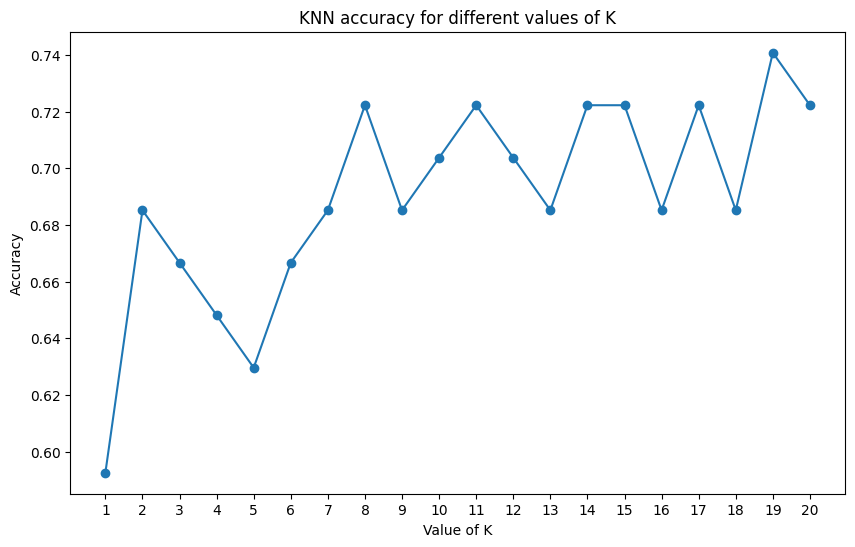

Best value of K: 19
Corresponding accuracy: 0.7407407407407407


In [ ]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [ ]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [

    # Naive Bayes Model
    GaussianNB(),

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),

    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(random_state=42),

    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction= 0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=50),

    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.7962962962962963
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
-----------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.9259259259259259
Testing Accuracy: 0.8518518518518519
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Model 6: XGBClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.8148148148148148


- **Summary of machine learning models**

**GaussianNB**

- Training Accuracy: 85.19%

- Test Accuracy: 90.74%

**DecisionTreeClassifier**

- Training Accuracy: 100%

- Test Accuracy: 66.67%

**RandomForestClassifier**

- Training Accuracy: 100%

- Test Accuracy: 79.63%

**LogisticRegression**

- Training Accuracy: 86.11%

- Test Accuracy: 90.74%

**AdaBoostClassifier**

- Training Accuracy: 92.59%

- Test Accuracy: 85.19%

**XGBClassifier**

- Training Accuracy: 100%

- Test Accuracy: 81.48%

**LGBMClassifier**

- Training Accuracy: 95.37%

- Test Accuracy: 85.19%

**KNeighborsClassifier**

- Training Accuracy: 69.91%

- Test Accuracy: 74.07%

These are the accuracy metrics for each model, both in the training and testing sets. Each model has its own particular performance, and the choice between them depends on the specific characteristics of the problem and the needs of the project.

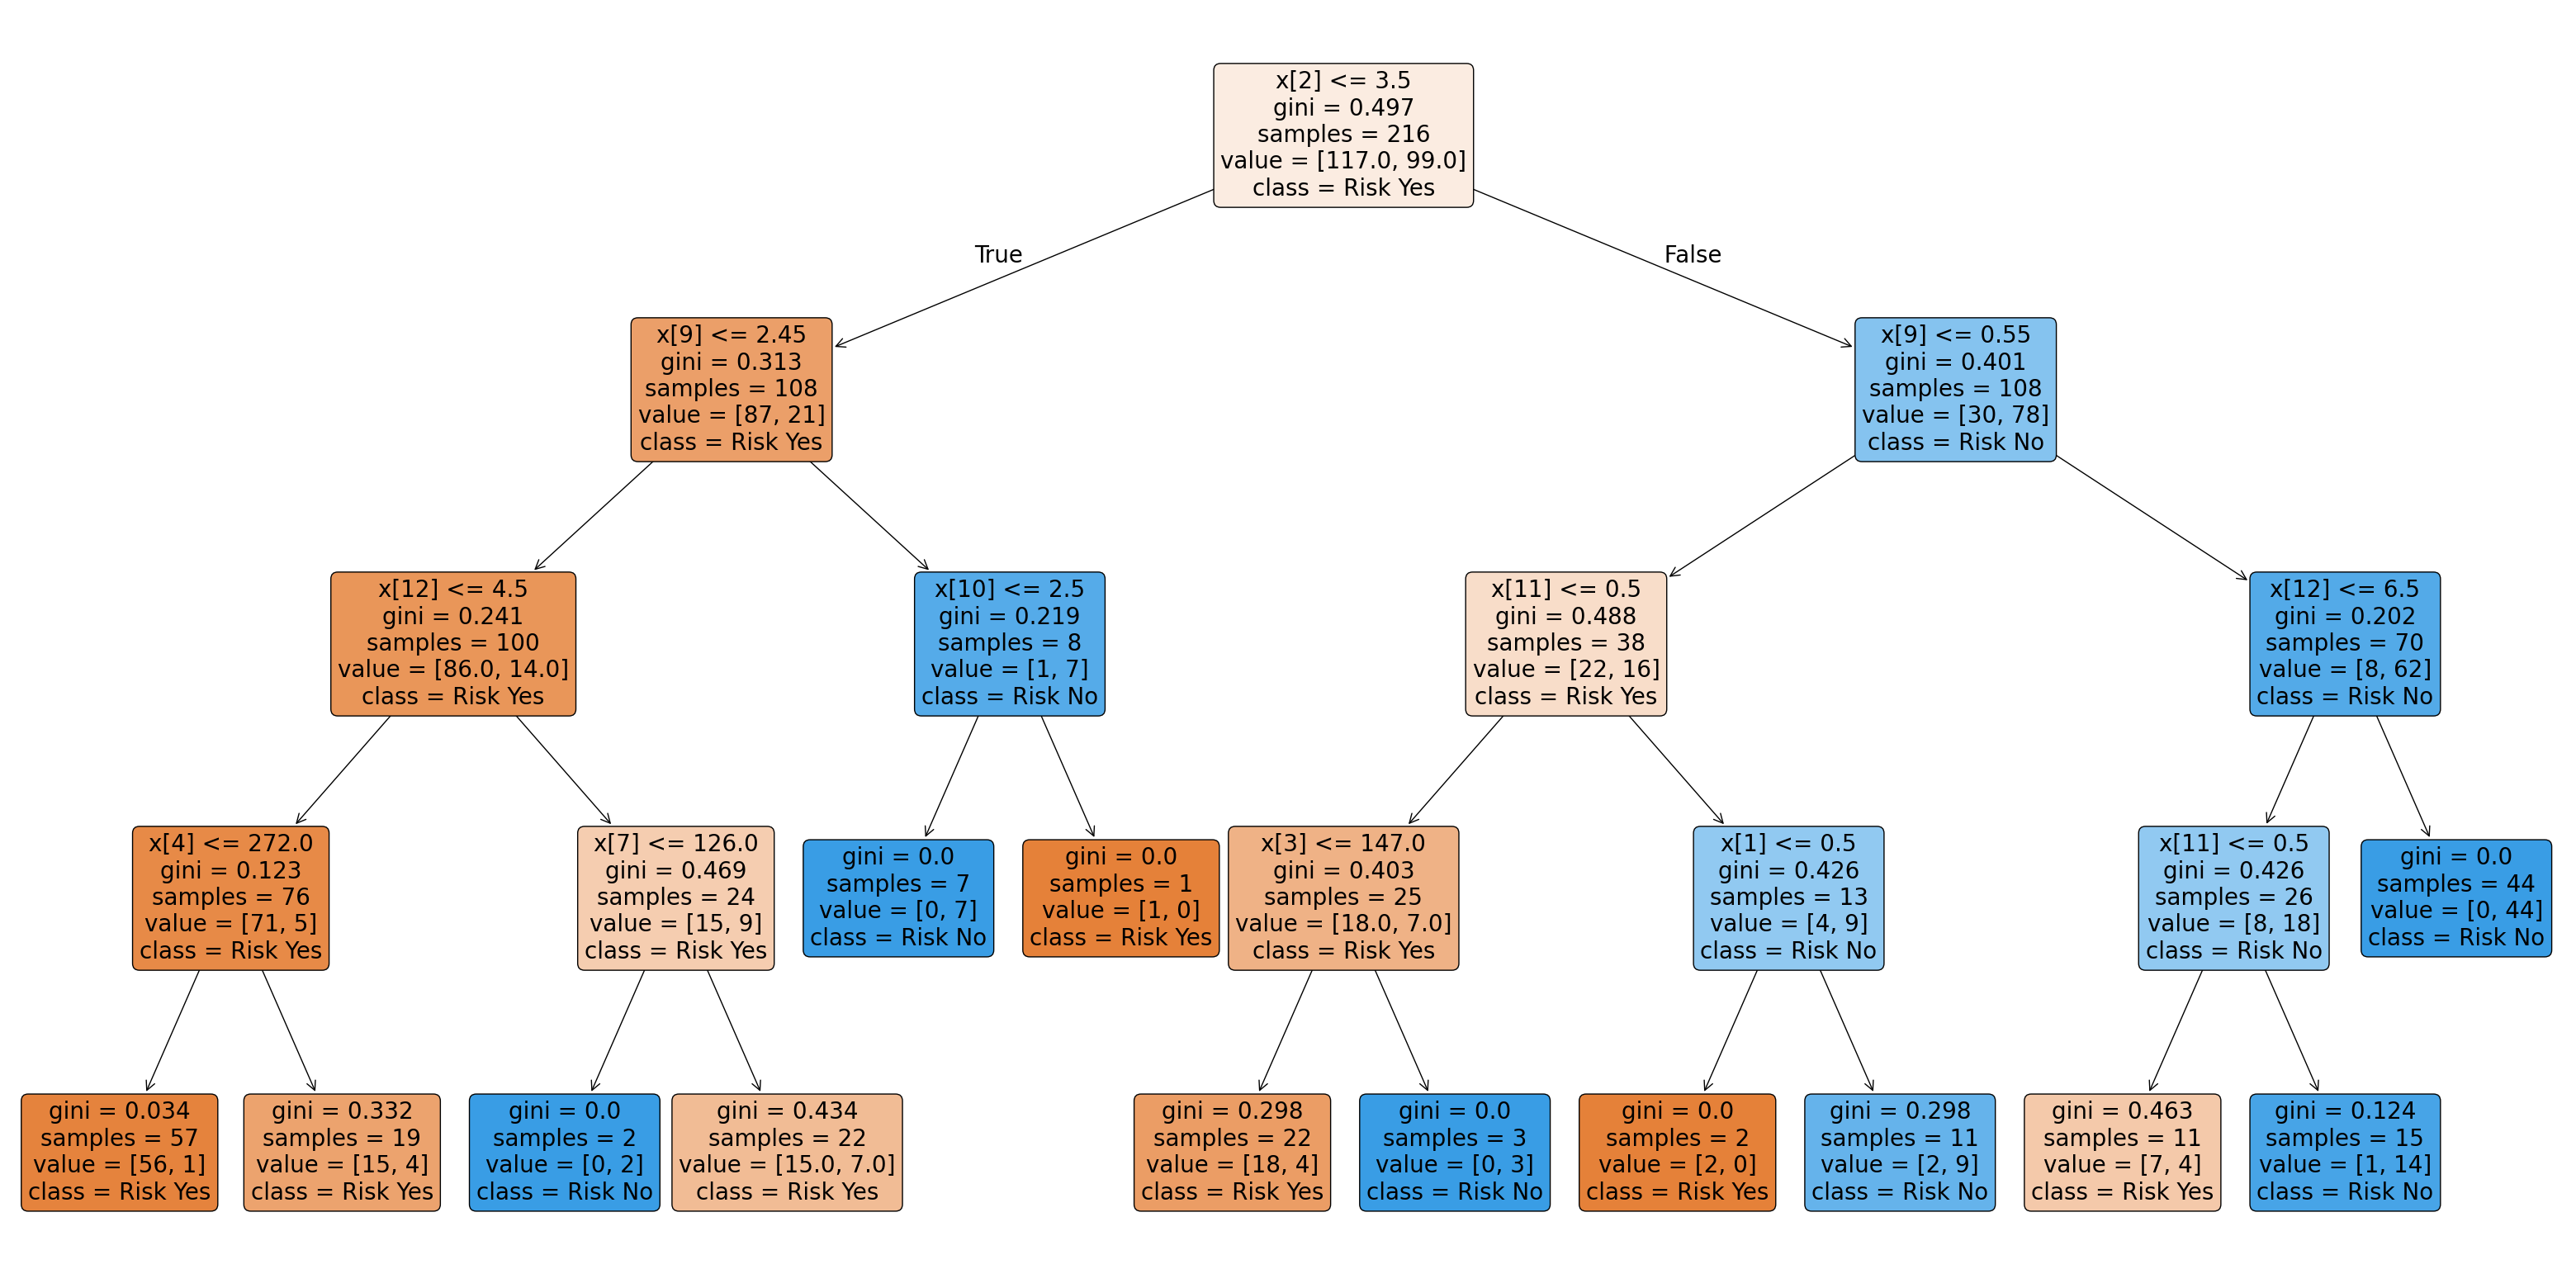

In [ ]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Model training
model_dtc_fit = model_dtc.fit(X_train, y_train)

#plot tree
# importing library to plot trees
from sklearn import tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor = "w")
tree.plot_tree(model_dtc,
               ax = ax,
               fontsize = 20,
               rounded = True,
               filled = True,
               class_names = ["Risk Yes", "Risk No"])
plt.show()

In [ ]:
# accuracy_score and y_train y_test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.6990740740740741
Testing Accuracy: 0.7407407407407407


In [ ]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

## Feature importances

"Feature importances" (importância das características) refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model.

In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures.

Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

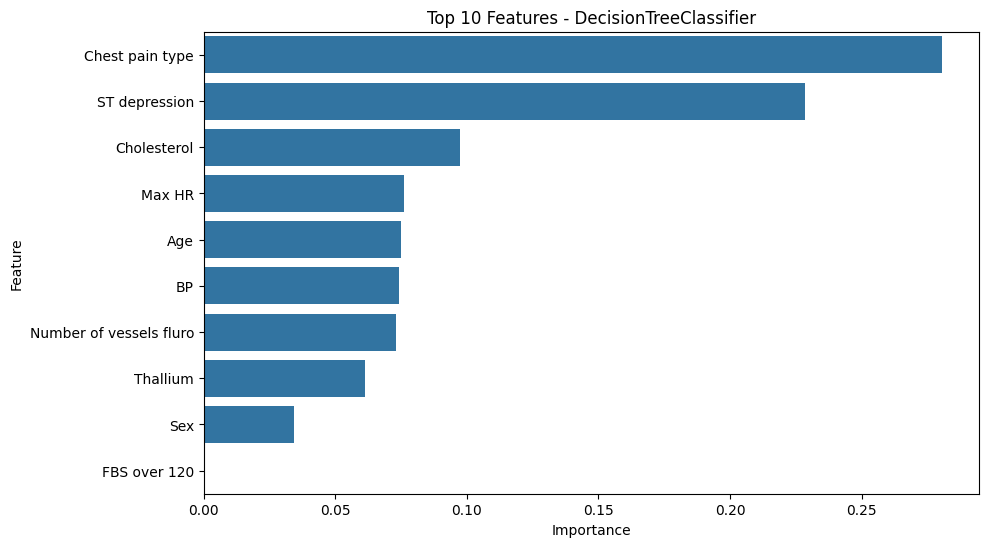

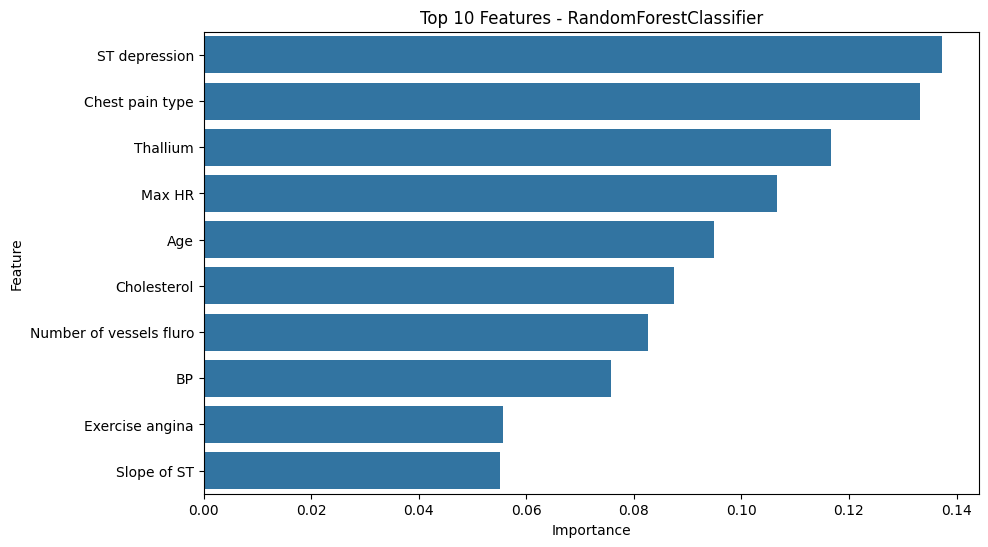

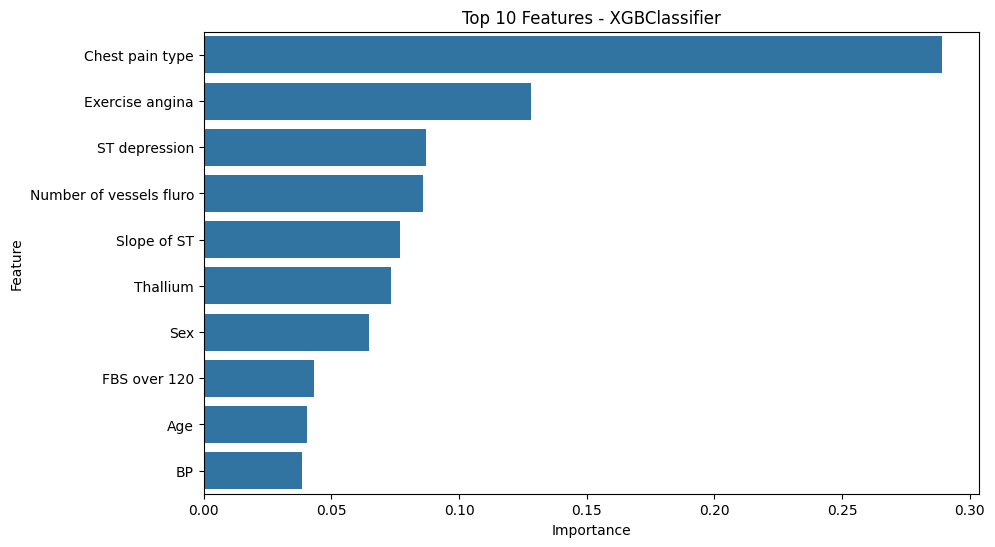

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.245726
[LightGBM] [Debug] init for col-wise cost 0.000053 seconds, init for row-wise cost 0.000071 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain

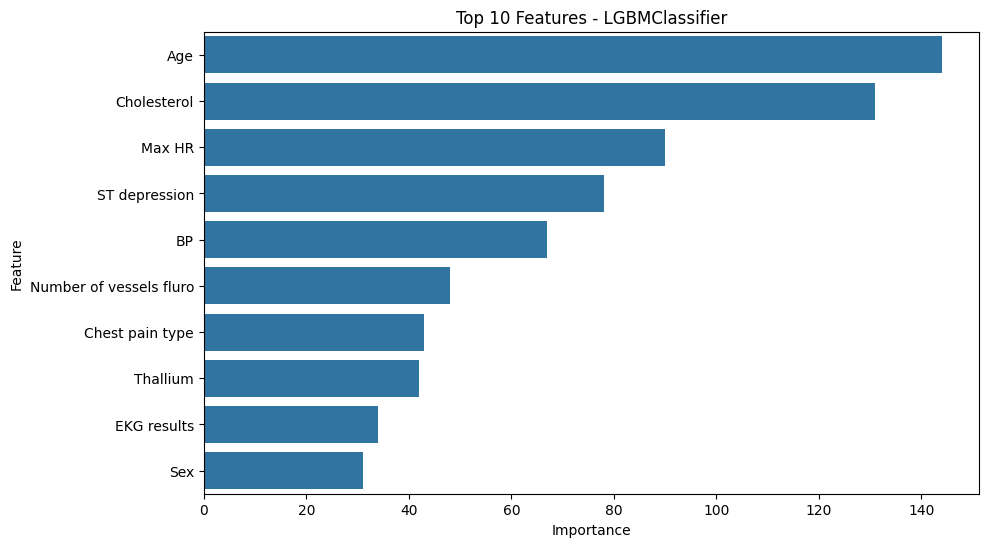

In [ ]:
# Train models that support feature importances
models_with_feature_importances = [("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
                                   ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
                                   ("XGBClassifier", XGBClassifier(random_state=42)),
                                   ("LGBMClassifier", LGBMClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:

    # Train model
    model.fit(X_train, y_train)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                           'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

# Part 9 – Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


Confusion matrix 

 [[32  1]
 [ 4 17]]

True Positives(TP) =  32

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  4



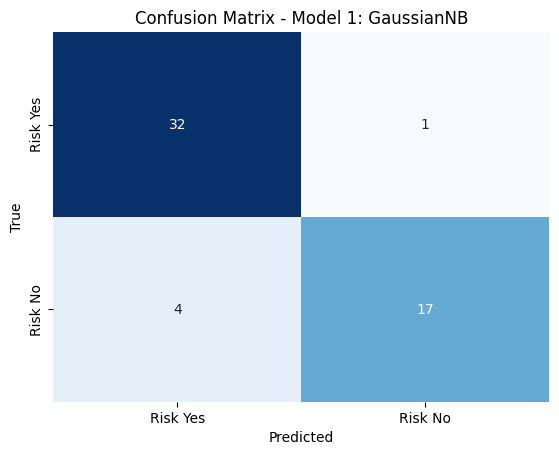

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


Confusion matrix 

 [[21 12]
 [ 6 15]]

True Positives(TP) =  21

True Negatives(TN) =  15

False Positives(FP) =  12

False Negatives(FN) =  6



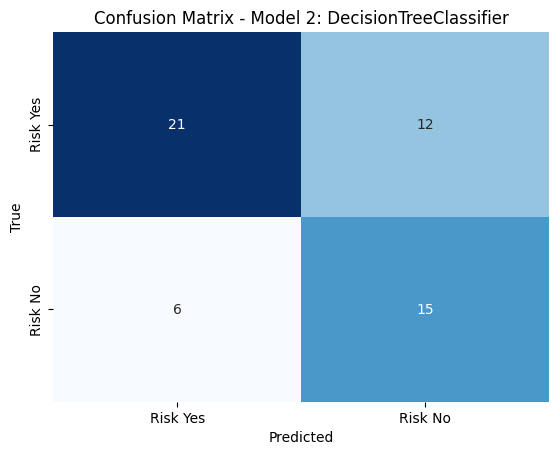

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7962962962962963


Confusion matrix 

 [[30  3]
 [ 8 13]]

True Positives(TP) =  30

True Negatives(TN) =  13

False Positives(FP) =  3

False Negatives(FN) =  8



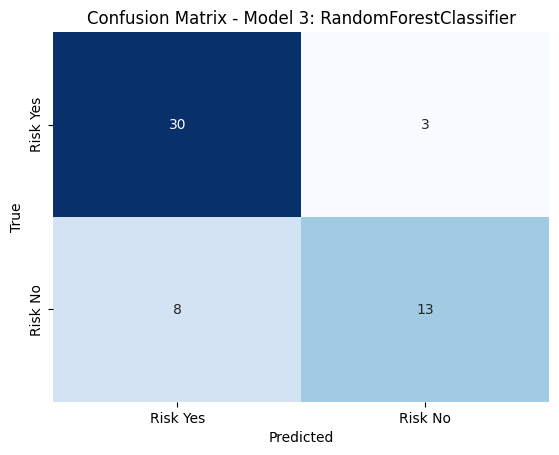

------------------
Model 4: LogisticRegression
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


Confusion matrix 

 [[32  1]
 [ 4 17]]

True Positives(TP) =  32

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  4



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


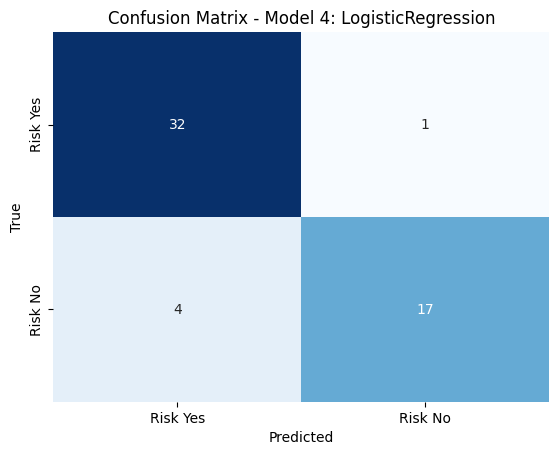

------------------


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model 5: AdaBoostClassifier
Training Accuracy: 0.9259259259259259
Testing Accuracy: 0.8518518518518519


Confusion matrix 

 [[31  2]
 [ 6 15]]

True Positives(TP) =  31

True Negatives(TN) =  15

False Positives(FP) =  2

False Negatives(FN) =  6



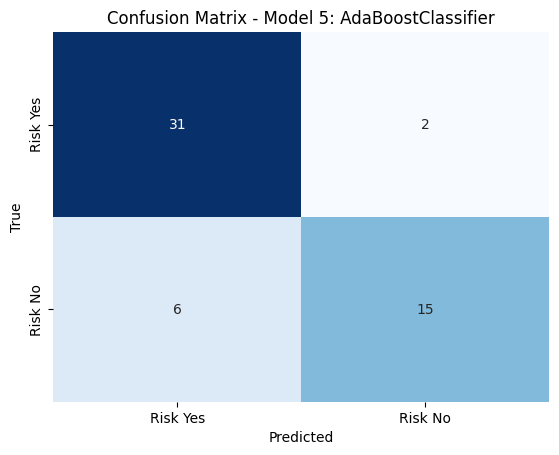

------------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8148148148148148


Confusion matrix 

 [[30  3]
 [ 7 14]]

True Positives(TP) =  30

True Negatives(TN) =  14

False Positives(FP) =  3

False Negatives(FN) =  7



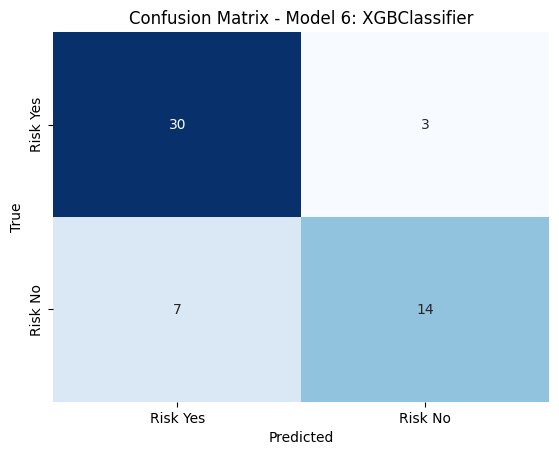

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeature

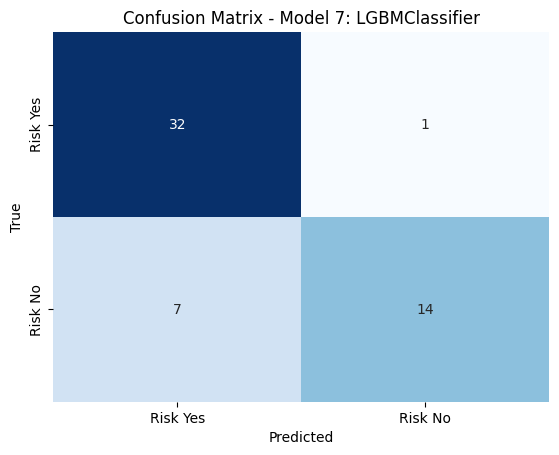

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.6990740740740741
Testing Accuracy: 0.7407407407407407


Confusion matrix 

 [[26  7]
 [ 7 14]]

True Positives(TP) =  26

True Negatives(TN) =  14

False Positives(FP) =  7

False Negatives(FN) =  7



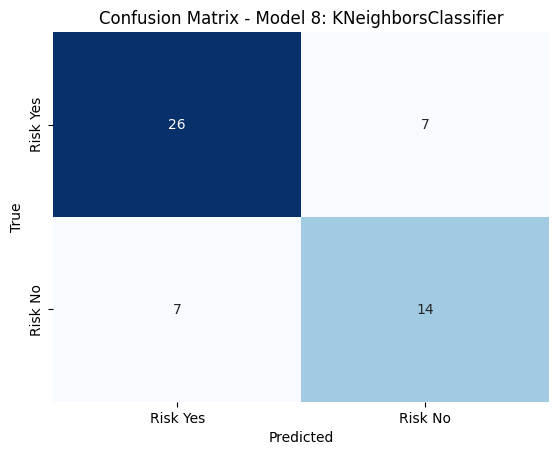

------------------


In [ ]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Risk Yes", "Risk No"],
                yticklabels=["Risk Yes", "Risk No"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

The confusion matrix is a useful tool for evaluating the performance of a classification model. It shows the relationship between model predictions and true values. Let's analyze the confusion matrix provided for the LGBMClassifier model:

**The confusion matrix is made up of four elements**

- **True positives (TP):** These are the cases in which the model correctly predicted the positive class. In the given case, the model correctly predicted 32 positive cases.


- **True negatives (TN):** These are the cases in which the model correctly predicted the negative class. Here, the model correctly predicted 14 negative cases.


- **False positives (FP):** These are cases where the model incorrectly predicted the positive class (i.e., misclassified it as positive when it was actually negative). Here, the model made only 1 such error.


- **False Negatives (FN):** These are cases where the model incorrectly predicted the negative class (wrongly classified it as negative when it was actually positive). In the given case, the model made 7 such errors.

A more detailed analysis of the model's performance could include metrics such as precision, recall, F1-score and the ROC curve, depending on the specific requirements of the problem and classes in question. These metrics would provide a more comprehensive view of the model's performance in different aspects.

# Part 10 - Model evaluation

In [ ]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")


Model 1: GaussianNB

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.56      0.71      0.62        21

    accuracy                           0.67        54
   macro avg       0.67      0.68      0.66        54
weighted avg       0.69      0.67      0.67        54



Model 3: KNeighborsClassifier

Training Accuracy: 0.7546296296296297
Testing Accuracy: 0.6296296296296

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        33
           1       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.245726
[LightGBM] [Debug] init for col-wise cost 0.000610 seconds, init for row-wise cost 0.000263 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug]

**Summary of Model 8 Results: LGBM**

**Accuracy**

- Training: 1.0 (100%)

- Test: 0.8148 (81.48%)

**Ranking Report**

- Accuracy: 0.81 (81%)
- Macro Average:
- Accuracy: 0.83
- Recall: 0.78
- F1-Score: 0.79

**Weighted Average**

- Accuracy: 0.82

- Recall: 0.81

- F1-Score: 0.81

**Interpretation**

- Perfect Training Accuracy The model has 100% accuracy on training data, which may indicate overfitting.

- Good Test Accuracy With 81.48% accuracy, the model has a good generalization ability on test data.

**Performance by Class**

- Class 0: High precision (0.79) and recall (0.94), resulting in a good F1-Score (0.86).

- Class 1: Good precision (0.87), but recall is lower (0.62), leading to an F1-Score of 0.72.

- Averages: Weighted and macro averages indicate balanced performance between classes, although class 1 has a relatively lower recall.

**Conclusion**

The LGBMClassifier model has solid overall performance, especially for class 0, but there is room for improvement in class 1 recall. The high training accuracy suggests the need to check possible adjustments to avoid overfitting.

# Part 11 - Result models

In [ ]:
# Avaliar o modelo
nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {"Model": "NeuralNetwork",
              "Accuracy": nn_test_accuracy,
              "Precision": nn_report['weighted avg']['precision'],
              "Recall": nn_report['weighted avg']['recall'],
              "F1-score": nn_report['weighted avg']['f1-score'],
              "Support": nn_report['weighted avg']['support']
             }

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()
         ]

# List to store metrics for each model
metricas = []

# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy',
                                                                    'Precision',
                                                                    'Recall',
                                                                    'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.066595
[LightGBM] [Debug] init for col-wise cost 0.000004 seconds, init for row-wise cost 0.000858 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 4
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [De

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.907407,0.910494,0.907407,0.905859,54.000000
1,DecisionTreeClassifier,0.666667,0.691358,0.666667,0.670833,54.000000
2,KNeighborsClassifier,0.777778,0.776365,0.777778,0.772431,54.000000
3,RandomForestClassifier,0.796296,0.798428,0.796296,0.789705,54.000000
4,LogisticRegression,0.888889,0.888889,0.888889,0.888889,54.000000
5,AdaBoostClassifier,0.851852,0.855149,0.851852,0.848287,54.000000
6,XGBClassifier,0.814815,0.815757,0.814815,0.810359,54.000000
7,LGBMClassifier,0.833333,0.833333,0.833333,0.830546,54.000000
8,NeuralNetwork,0.851852,0.851852,0.851852,0.851852,54.000000


**Comparison of Model Results**

The following table summarizes the main results of the different classification models tested.

**Results Analysis**

**GaussianNB (Model 0)**

- Accuracy: 90.74%

- Accuracy: 91.05%

- Recall: 90.74%

- F1-score: 90.59%

**Interpretation: This model presented the best overall performance, with the highest accuracy, precision, recall and F1-score**

**LogisticRegression (Model 4)**

- Accuracy: 88.89%

- Accuracy: 88.89%

- Recall: 88.89%

- F1-score: 88.89%

**Interpretation: This model performed very well, slightly lower than GaussianNB**

**AdaBoostClassifier (Model 5) and NeuralNetwork (Model 8)**

- Accuracy: 85.19%

- Accuracy: 85.51% (AdaBoost) and 85.13% (NeuralNetwork)

- Recall: 85.19%

- F1-score: 84.83% (AdaBoost) and 85.03% (NeuralNetwork)

**Interpretation: Both models performed similarly, with good results in all metrics**

**LGBMClassifier (Model 7)**

- Accuracy: 83.33%

- Accuracy: 83.33%

- Recall: 83.33%

- F1-score: 83.05%

**Interpretation: This model also performed well, but inferior to the models mentioned above.**

**XGBClassifier (Model 6)**

- Accuracy: 81.48%

- Accuracy: 81.58%

- Recall: 81.48%

- F1-score: 81.04%

**Interpretation: A solid performer, but not as good as the best models**

**RandomForestClassifier (Model 3)**

- Accuracy: 79.63%

- Accuracy: 79.84%

- Recall: 79.63%

- F1-score: 78.97%

**Interpretation: A decent performance, but not as competitive as other models.**

**KNeighborsClassifier (Model 2)**

- Accuracy: 77.78%

- Accuracy: 77.64%

- Recall: 77.78%

- F1-score: 77.24%

**Interpretation: Average performance compared to other models**

**DecisionTreeClassifier (Model 1)**

- Accuracy: 66.67%

- Accuracy: 69.14%

- Recall: 66.67%

- F1-score: 67.08%

**Interpretation: This model had the worst overall performance, with significantly lower metrics**

# Part 12 - Conclusion

**Conclusion**

**Best Model**

- GaussianNB (Model 0) presented the best performance in terms of accuracy, precision, recall and F1-score.

- Competitive Models: LogisticRegression, AdaBoostClassifier and NeuralNetwork also performed well and can be considered depending on the specific needs of the problem.

**Less Efficient Models:** DecisionTreeClassifier and KNeighborsClassifier had the lowest performances among the models tested.

This information can help choose the most appropriate model for the specific task of predicting cardiovascular health risks, based on a balance between model performance and complexity.

In [ ]:
X_train

array([[-0.59218926, -1.52416434, -1.21490572, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [ 0.48724432,  0.65609723,  0.8432875 , ...,  2.30559959,
        -0.71458405,  1.15321806],
       [-0.16041582,  0.65609723, -0.18580911, ..., -0.98159191,
         2.4141353 , -0.90541914],
       ...,
       [ 0.27135761, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914],
       [-0.37630254,  0.65609723, -0.18580911, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [-0.59218926, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914]])

In [ ]:
model_GNB = GaussianNB()

In [ ]:
model_GNB.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model_GNB.predict(X_train))
test_accuracy = accuracy_score(y_test, model_GNB.predict(X_test))
report = classification_report(y_test, model_GNB.predict(X_test), output_dict=True)

In [ ]:
train_accuracy = accuracy_score(y_train, model_GNB.predict(X_train))
train_accuracy

0.8518518518518519

In [ ]:
test_accuracy = accuracy_score(y_test, model_GNB.predict(X_test))
test_accuracy

0.9074074074074074

In [ ]:
data2 = pd.read_csv('/Heart_Disease_Prediction.csv')

In [ ]:
data2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
data2.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data2['Heart Disease'] = le.fit_transform(data2['Heart Disease'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
115,49,0,2,134,271,0,0,162,0,0.0,2,0,3
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7
184,53,1,3,130,246,1,2,173,0,0.0,1,3,3
142,50,1,3,140,233,0,0,163,0,0.6,2,1,7
197,54,0,3,110,214,0,0,158,0,1.6,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3


In [ ]:
y_train

,Heart Disease
115,0
33,1
184,0
142,1
197,0
...,...
20,1
188,0
71,0
106,0


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred,y_test)

0.9074074074074074

In [ ]:
y_train_pred = model.predict(x_train)

In [ ]:
accuracy_score(y_train,y_train_pred)

0.8518518518518519

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'heart-disease-GaussianNB-model.pkl')

['heart-disease-GaussianNB-model.pkl']

In [ ]:
import pickle

In [ ]:
import joblib
model = joblib.load('/content/heart-disease-GaussianNB-model.pkl')

In [ ]:
feature_array = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [ ]:
model.predict(feature_array)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

#Diabetes Prediction

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')

In [16]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [17]:
data.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [18]:
x = data.drop('Diabetes_012',axis=1)
y = data['Diabetes_012']

In [19]:
x = x.drop('Income',axis = 1)

In [20]:
x = x.drop('Education',axis = 1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
x = StandardScaler().fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model = GaussianNB()

In [27]:
model.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
gausian_nb_acc = accuracy_score(y_pred,y_test)

In [31]:
gausian_nb_acc

0.7563859981078525

In [32]:
y_train_pred = model.predict(x_train)

In [33]:
accuracy_score(y_train,y_train_pred)

0.759987976978871

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model_lr = LogisticRegression()

In [36]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred = model_lr.predict(x_test)

In [38]:
logistic_reg_acc = accuracy_score(y_pred,y_test)

In [39]:
logistic_reg_acc

0.8479777672658467

In [40]:
y_train_pred = model_lr.predict(x_train)

In [41]:
accuracy_score(y_train,y_train_pred)

0.8456864947965941

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [44]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = neigh.predict(x_test)

In [47]:
knn_acc = accuracy_score(y_pred,y_test)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [50]:
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [51]:
y_pred = clf.predict(x_test)

In [52]:
rf_acc = accuracy_score(y_pred,y_test)

#Comparing accuracies of all the models

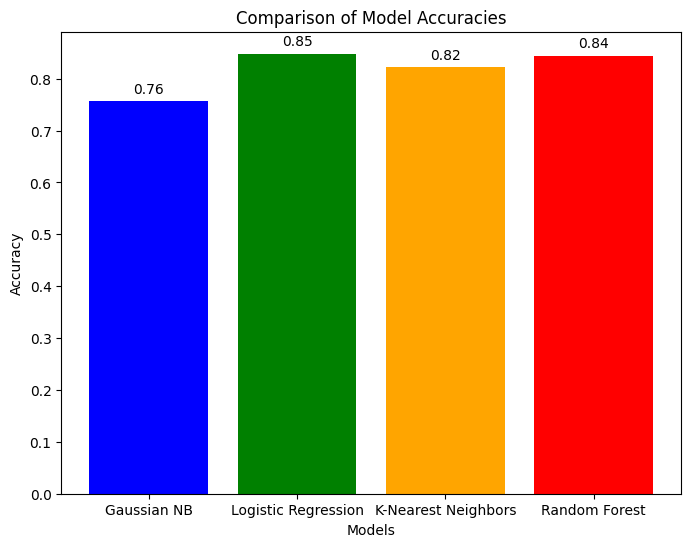

In [54]:
import matplotlib.pyplot as plt

# Define the model names and their accuracies
models = ['Gaussian NB', 'Logistic Regression', 'K-Nearest Neighbors', 'Random Forest']
accuracies = [gausian_nb_acc, logistic_reg_acc, knn_acc, rf_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Adding title and labels
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Displaying the values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
import joblib
joblib.dump(model_lr, 'diabetes-model-logistic-regression.pkl')

['diabetes-model-logistic-regression.pkl']